# **1. Import Library**

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

# **2. Load Dataset**

In [108]:
# Import Data
data = pd.read_csv('https://raw.githubusercontent.com/filasofiya19/Sistem-Rekomendasi-K-Drama-Content-Based---Collaborative-Filtering/refs/heads/main/kdrama.csv')
print(data)

                       Name                   Aired Date  Year of release  \
0            Move to Heaven                 May 14, 2021             2021   
1            Flower of Evil  Jul 29, 2020 - Sep 23, 2020             2020   
2         Hospital Playlist  Mar 12, 2020 - May 28, 2020             2020   
3       Hospital Playlist 2  Jun 17, 2021 - Sep 16, 2021             2021   
4                 My Mister  Mar 21, 2018 - May 17, 2018             2018   
..                      ...                          ...              ...   
245    Live Up to Your Name   Aug 12, 2017 - Oct 1, 2017             2017   
246    Queen for Seven Days   May 31, 2017 - Aug 3, 2017             2017   
247                  Memory   Mar 18, 2016 - May 7, 2016             2016   
248        A Korean Odyssey   Dec 23, 2017 - Mar 4, 2018             2017   
249  Voice 4: Judgment Hour  Jun 18, 2021 - Jul 31, 2021             2021   

    Original Network              Aired On  Number of Episodes       Durati

# **3. Data Understanding**

**Top 250 Korean Dramas (KDrama) Dataset**

Tentang Dataset:

Dataset ini diambil dari [Kaggle](https://www.kaggle.com/datasets/ahbab911/top-250-korean-dramas-kdrama-dataset) mencakup 17 fitur dan 250 sampel, dengan sampel tersebut merupakan top rank judul K-Drama dalam website MyDramaList.

Untuk setaip fiturnya berikut penjelasanya:

| Fitur               | Deskripsi                                                                                           |
|---------------------|-----------------------------------------------------------------------------------------------------|
| Name                | Judul dari K-drama.                                                                                 |
| Aired Date          | Tanggal pertama kali K-drama ditayangkan.                                                           |
| Year of Release     | Tahun di mana K-drama ini pertama kali dirilis.                                                     |
| Original Network    | Channel televisi atau platform OTT tempat K-drama ini pertama kali ditayangkan.                     |
| Number of Episodes  | Jumlah total episode dari K-drama tersebut.                                                         |
| Duration            | Durasi setiap episode dalam jam dan menit.                                                          |
| Content Rating      | Rating usia yang sesuai untuk penonton K-drama ini.                                                 |
| Rating              | Peringkat atau rating berdasarkan vote pengguna MyDramaList pada saat dataset dibuat.               |
| Synopsis            | Ringkasan atau plot cerita K-drama.                                                                 |
| Genre               | Genre atau kategori utama yang menggambarkan tema K-drama.      |
| Tags                | Elemen-elemen unik dari K-drama.          |
| Director            | Nama sutradara yang bertanggung jawab atas K-drama ini.                                             |
| Screenwriter        | Nama penulis skenario yang menulis cerita K-drama.                                                  |
| Cast                | Daftar aktor dan aktris yang membintangi K-drama ini.                                               |
| Production Companies| Perusahaan yang memproduksi K-drama tersebut.                                                       |
| Rank                | Peringkat K-drama dalam daftar top 250, berdasarkan popularitas dan rating.                         |


## **3.1 Cek Tipe Data**

In [109]:
# Cek Tipe Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  250 non-null    object 
 1   Aired Date            250 non-null    object 
 2   Year of release       250 non-null    int64  
 3   Original Network      250 non-null    object 
 4   Aired On              250 non-null    object 
 5   Number of Episodes    250 non-null    int64  
 6   Duration              250 non-null    object 
 7   Content Rating        245 non-null    object 
 8   Rating                250 non-null    float64
 9   Synopsis              250 non-null    object 
 10  Genre                 250 non-null    object 
 11  Tags                  250 non-null    object 
 12  Director              249 non-null    object 
 13  Screenwriter          249 non-null    object 
 14  Cast                  250 non-null    object 
 15  Production companies  2

Dataset ini memiliki 1 tipe data float, 2 tipe data integer, 14 tipe data object.

## **3.2 Cek Dimensi Data**

In [110]:
# Cek dimensi data
data.shape

(250, 17)

( data memiliki 250 records (baris) dan 17 feature(kolom))

In [111]:
# Cek 5 data teratas
data.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


In [112]:
#Cek 5 data terbawah
data.tail()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
245,Live Up to Your Name,"Aug 12, 2017 - Oct 1, 2017",2017,tvN,"Saturday, Sunday",16,1 hr. 10 min.,15+ - Teens 15 or older,8.3,"Heo Im, who is born in a concubine family in t...","Historical, Romance, Medical, Fantasy","Time Travel, Joseon Dynasty, Acupuncture, Stro...",Hong Jong Chan,Kim Eun Hee,"Kim Nam Gil, Kim Ah Joong, Yoo Min Kyu, Moon G...",Bon Factory Worldwide,#246
246,Queen for Seven Days,"May 31, 2017 - Aug 3, 2017",2017,KBS2,"Wednesday, Thursday",20,60 min.,15+ - Teens 15 or older,8.3,This drama is about the love story between Kin...,"Historical, Romance, Melodrama, Political","Joseon Dynasty, Sibling Rivalry, Lying, Reveng...",Lee Jung Sub,Choi Jin Young,"Park Min Young, Yeon Woo Jin, Lee Dong Gun, Ja...","Monster Union, OH!BROTHERS Production",#247
247,Memory,"Mar 18, 2016 - May 7, 2016",2016,tvN,"Friday, Saturday",16,1 hr. 5 min.,15+ - Teens 15 or older,8.3,Park Tae Suk is a lawyer who finds out that he...,"Law, Romance, Life, Drama","Alzheimer's Disease, Teamwork, Bromance, Mothe...",Park Chan Hong,Kim Ji Woo,"Lee Sung Min, Kim Jee Soo, Park Jin Hee, Lee J...",MI Inc.,#248
248,A Korean Odyssey,"Dec 23, 2017 - Mar 4, 2018",2017,"Netflix, tvN","Saturday, Sunday",20,1 hr. 20 min.,15+ - Teens 15 or older,8.3,"In 2017, Son Oh Gong and Ma Wang are in confli...","Horror, Comedy, Romance, Fantasy","Ghost-seeing Female Lead, Special Power, Super...","Park Hong Kyun, Kim Jung Hyun, Kim Byung Soo","Hong Jung Eun, Hong Mi Ran","Lee Seung Gi, Cha Seung Won, Oh Yeon Seo, Lee ...",JS Pictures,#249
249,Voice 4: Judgment Hour,"Jun 18, 2021 - Jul 31, 2021",2021,tvN,"Friday, Saturday",14,1 hr. 3 min.,15+ - Teens 15 or older,8.3,A serial killer with an enhanced hearing abili...,"Action, Thriller, Mystery, Crime","Investigation, Suspense, Animal Abuse, Psychol...","Shin Yong Hwi, Yoon Ra Young",Ma Jin Won,"Lee Ha Na, Song Seung Heon, Son Eun Seo, Kang...",Story & Pictures Media,#250


## **3.3 Cek Missing Value**

In [113]:
# Cek Missing Value
data.isnull().sum()

,0
Name,0
Aired Date,0
Year of release,0
Original Network,0
Aired On,0
Number of Episodes,0
Duration,0
Content Rating,5
Rating,0
Synopsis,0


In [114]:
data[data.isnull().any(axis=1)]


,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
140,One Dollar Lawyer,"Sep 23, 2022 - Nov 11, 2022",2022,SBS,"Friday, Saturday",12,1 hr. 10 min.,NaN,8.4,Cheon Ji Hun is a lawyer with unusual flair. H...,"Comedy, Law, Drama","Lawyer Male Lead, Former Prosecutor Male Lead,...",Kim Jae Hyun,"Choi Soo Jin, Choi Chang Hwan","Namkoong Min, Kim Ji Eun, Choi Dae Hoon, Lee D...",Studio S,#141
146,Duel,"Jun 3, 2017 - Jul 23, 2017",2017,OCN,"Saturday, Sunday",16,1 hr. 3 min.,NaN,8.4,"Jang Deuk Cheon, a hardened detective cop whos...","Thriller, Mystery, Sci-Fi","Amnesia, Human Experimentation, Kidnapping, Tr...",Lee Jong Jae,Kim Yoon Joo,"Jung Jae Young, Kim Jung Eun, Yang Se Jong, Se...",Chorokbaem Media,#147
171,Player,"Sep 29, 2018 - Nov 11, 2018",2018,OCN,"Saturday, Sunday",14,1 hr. 5 min.,NaN,8.4,A police redemption team consisting of a swind...,"Action, Thriller, Mystery, Comedy","Strong Female Lead, Corruption, Hidden Identit...",Go Jae Hyun,Shin Jae Hyung,"Song Seung Heon, Krystal Jung, Lee Si Eon, Tae...",iWill Media,#172
190,The Mysterious Class,"Nov 12, 2021 - Dec 31, 2021",2021,YouTube,Friday,8,20 min.,NaN,8.3,"""There are 21 students in our class."" ""What ar...","Mystery, Horror, Youth, Supernatural","Student, Ghost, Investigation, High School, Sc...",Ha Han Me,Han Song-yi,"Choi Hyun Suk, Park Ji Hoon, Yoshi, Kim Jun Ky...",YG Entertainment,#191
192,"It's Okay, That's Friendship","Mar 5, 2021",2021,YouTube,Friday,1,20 min.,G - All Ages,8.3,The 12 members of TREASURE take on acting for ...,"Comedy, Life","Idol Male Lead, Multiple Mains, Transfer Stude...",NaN,NaN,"Choi Hyun Suk, Park Ji Hoon, Kim Jun Kyu, Yosh...",YG Entertainment,#193
218,Angry Mom,"Mar 18, 2015 - May 7, 2015",2015,MBC,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,8.3,"The protagonist, Jo Kang Ja was once legendary...","Comedy, Drama, Melodrama","Independent Female Lead, Mother-Daughter Relat...",Ashbun,Kim Ban Di,"Kim Hee Sun, Kim Yoo Jung, Ji Hyun Woo, Kim Ji...",NaN,#219
230,Liar Game,"Oct 20, 2014 - Nov 25, 2014",2014,tvN,"Monday, Tuesday",12,1 hr. 3 min.,NaN,8.3,Various contestants take part in a game show w...,"Thriller, Mystery, Psychological, Drama","Naive Female Lead, Debt, Game Show, Swindler M...",Kim Hong Seon,Ryu Yong Jae,"Lee Sang Yoon, Kim So Eun, Shin Sung Rok, Cha ...","Apollo Pictures, Fantagio",#231
240,Coffee Prince,"Jul 2, 2007 - Aug 28, 2007",2007,MBC,"Monday, Tuesday",17,60 min.,15+ - Teens 15 or older,8.3,Choi Han Gyul is the grandson of chairwoman Ba...,"Food, Comedy, Romance, Drama","Cross-Dressing, Hidden Identity, Boss-Employee...",Lee Yoon Jung,"Jang Hyun Joo, Lee Jung Ah","Gong Yoo, Yoon Eun Hye, Lee Sun Kyun, Chae Jun...",NaN,#241


Terlihat beberapa fitur yang memiliki 9 missing value yaitu Content Rating, Director, Screenwriter dan Production companies yang tersebar dalam 8 baris. karena 8 baris ini presentasinya kecil jadi baris yg ada missing valuenya dihapus saja

## **3.4  Data Duplikat**

In [115]:
# cek duplikat
data.duplicated().any()

False

Tidak ada duplikat dalam dataset ini.

# **4. Analisis Univariat dan Visulisasinya**

## **4.1 Analisis Univariat Tahun Rilis**

<Axes: xlabel='Year of release'>

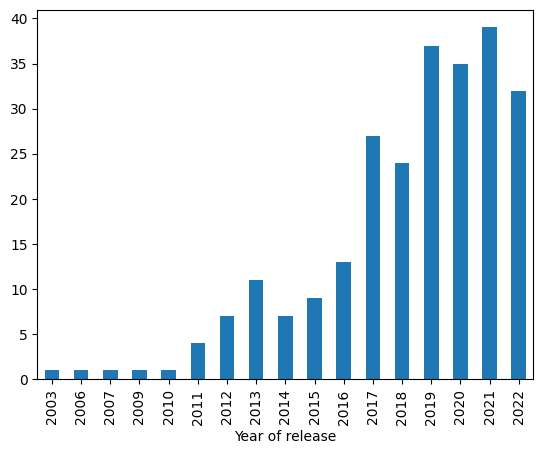

In [116]:
# Analisis Univariat Tahun Rilis
data['Year of release'].value_counts().sort_index().plot(kind='bar')

Pada Dataset ini paling banyak K-Drama yang rilis tahun 2021.

## **4.2 Analisis Univariat Saluran Penyiaran K-Drama**

<Axes: xlabel='Original Network'>

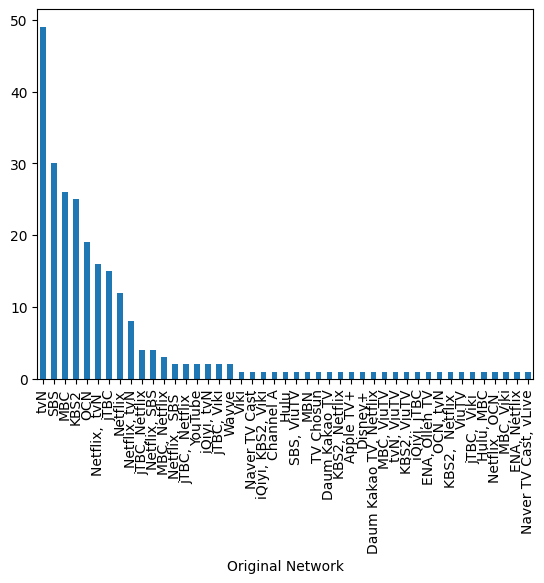

In [117]:
# Analisis Univariat Saluran Penyiaran K-Drama
data['Original Network'].value_counts().plot(kind='bar')

Terlihat pada dataset ini, k-darama yang ada terbanyak dari saluran tvN.

## **4.3 Analisis Univariat Hari penyiaran K-Drama**

<Axes: xlabel='Aired On'>

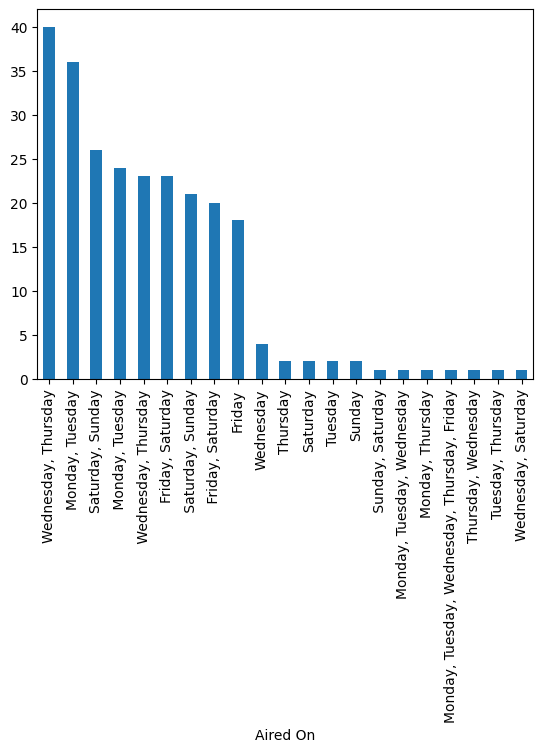

In [118]:
# Analisis Univariat Hari penyiaran K-Drama
data['Aired On'].value_counts().plot(kind='bar')

Terlihat pada dataset ini, k-drama yang ada terbanyak di siarkan pada Wednesday, Thursday

## **4.4 Analisis Univariat Jumlah Episode K-Drama**

<Axes: ylabel='Frequency'>

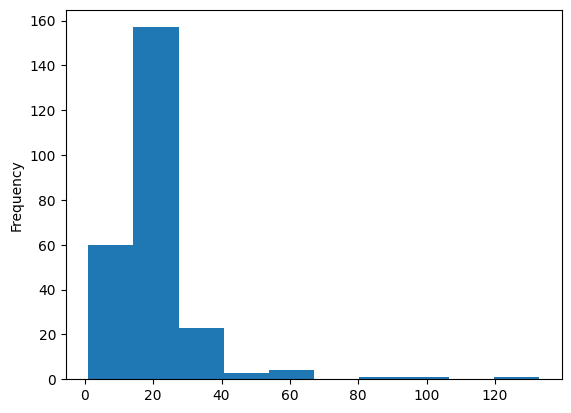

In [119]:
# Analisis UnivariatJumlah Episode K-Drama
data['Number of Episodes'].plot(kind='hist', bins=10)

Rentang episode 10 -30 mendominasi kebanyakan k-darama dalam dataset ini.

 ## **4.5 Analisis Univariat Waktu Durasi Tayang K-Drama per episode**

In [120]:
#Convert Durasi ke dalam menit
import re

def convert_duration(duration):
    # Cari jam dan menit
    hours = re.findall(r'(\d+)\s*hr', duration)
    minutes = re.findall(r'(\d+)\s*min', duration)

    # Konversi jam ke menit, jika ada
    total_minutes = 0
    if hours:
        total_minutes += int(hours[0]) * 60
    if minutes:
        total_minutes += int(minutes[0])

    return total_minutes

# Terapkan fungsi ke kolom 'Duration'
data['Duration'] = data['Duration'].apply(convert_duration)


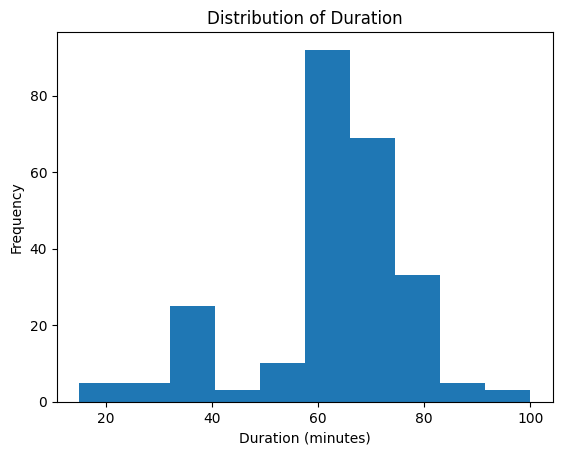

In [121]:
data['Duration'].plot(kind='hist', bins=10)
plt.title('Distribution of Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

Kebanyakan K-Drama dalam dataset ini berdurasi 60 - 70 menit.

## **4.6 Analisis Univariat kategori Content Rating usia**  

<Axes: xlabel='Content Rating'>

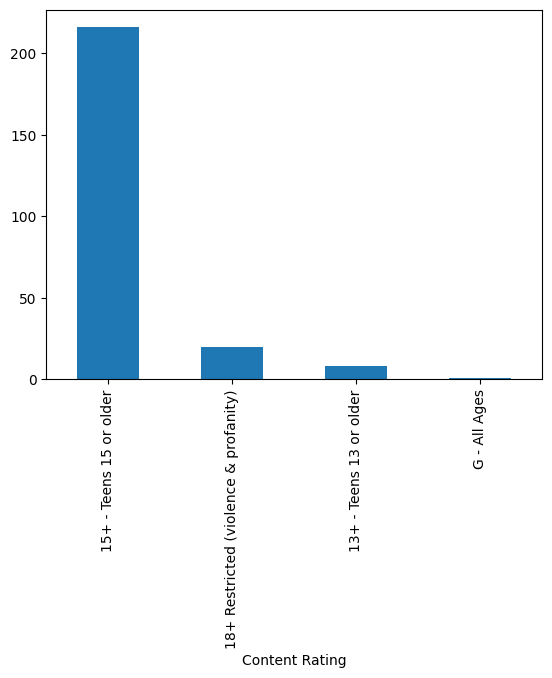

In [122]:
data['Content Rating'].value_counts().plot(kind='bar')

Kebanayakan K-Drama dataset ini diperuntukkan untuk penonton dengan usia 15 tahun ke atas.

 ## **4.7 Analisis Univariat Rating K-Drama**

<Axes: ylabel='Frequency'>

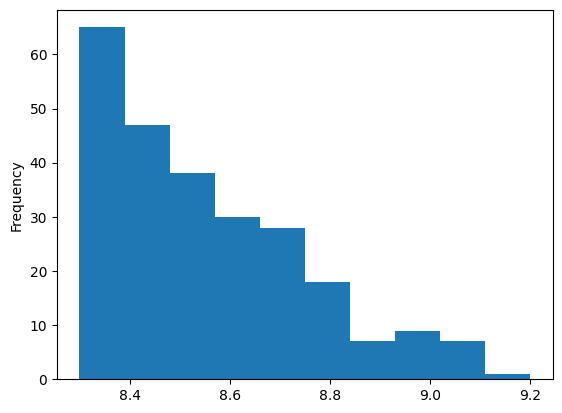

In [123]:
data['Rating'].plot(kind='hist', bins=10)


Kebanykan K-Drama dalam dataset ini memiliki rating 8,3 - 8,4.

# **5. Analisis Multivariat dan Visualisasinya**

## **5.1 Analsis Multivariat Rating dengan Jumlah Episode**

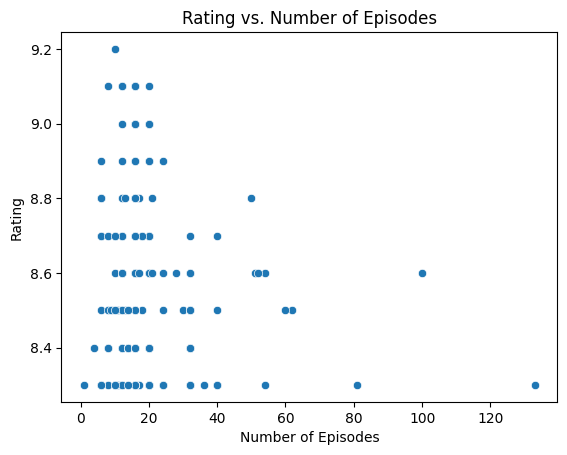

In [124]:
sns.scatterplot(x='Number of Episodes', y='Rating', data=data)
plt.title('Rating vs. Number of Episodes')
plt.show()


K-Drama dengan Rating Tinggi kebanyakan rentang episodenya antara 0 - 40.

## **5.2 Analsis Multivariat Rating, Content Rating dengan Jumlah Episode**

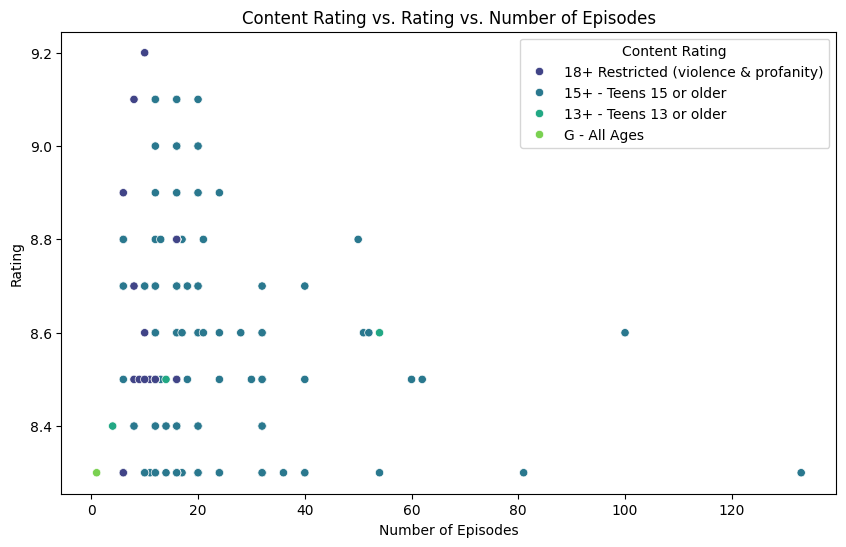

In [125]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Episodes', y='Rating', hue='Content Rating', data=data, palette='viridis')
plt.title('Content Rating vs. Rating vs. Number of Episodes')
plt.show()


Tidak terlalu berpengaruh anatara Rating, Content Rating dengan Jumlah Episode.

## **5.3 Analsis Multivariat Rating dengan Genre**

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


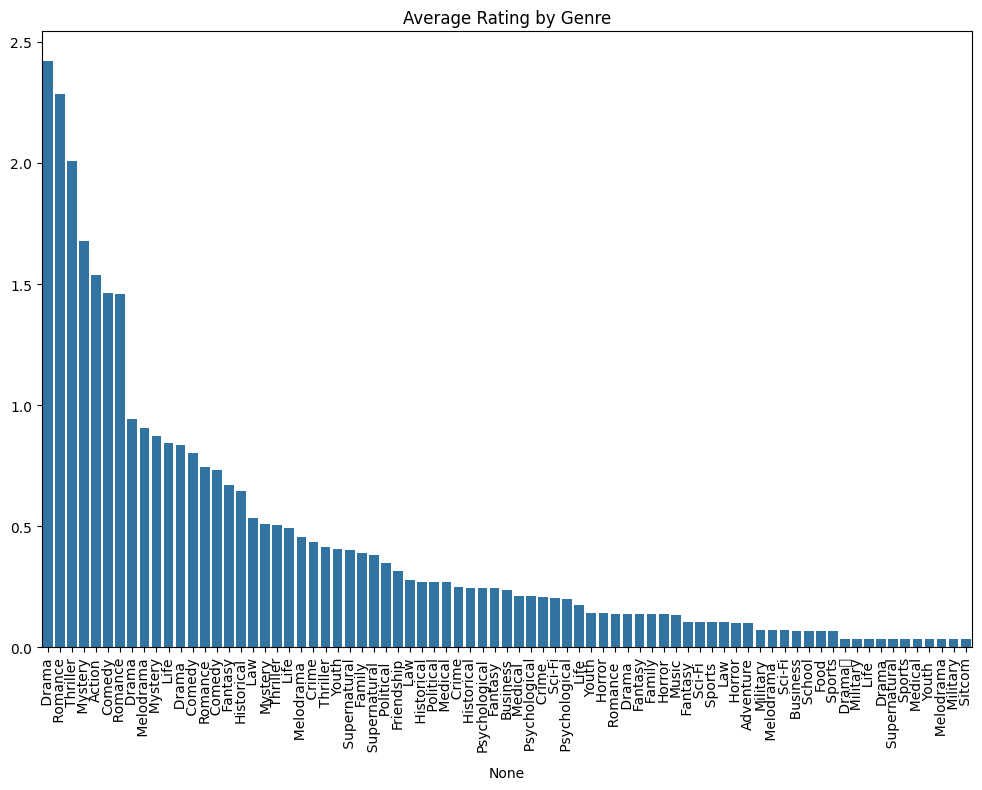

In [126]:
# Pisahkan genre
genre_ratings = data['Genre'].str.get_dummies(',').multiply(data['Rating'], axis=0)
genre_avg_ratings = genre_ratings.mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_avg_ratings.index, y=genre_avg_ratings.values)
plt.title('Average Rating by Genre')
plt.xticks(rotation=90)
plt.show()


Rating Tinggi K-Drama didominasi Genre Drama, Romance, dan Thriller.

# **6. Data Preparation**

## **6.1 Handling Missing Value**

In [127]:
data.dropna(inplace=True)

In [128]:
# Cek Missing Value
data.isnull().sum()

,0
Name,0
Aired Date,0
Year of release,0
Original Network,0
Aired On,0
Number of Episodes,0
Duration,0
Content Rating,0
Rating,0
Synopsis,0


Sekarang tidak ada missing value lagi, data yang semula memiliki 250 data judul film, sekarang hanya ada 242 judul film.

# **7. Model Development dengan Content Based Filtering**

Teknik ini merekomendasikan item yang mirip dengan preferensi pengguna di masa lalu. Content-Based Filtering merekomendasikan item berdasarkan kemiripan fitur  preferensi item yang sudah disukai atau dipilih oleh pengguna di masa a. Dalam kasus ini, fitur yang digunakan adalah genre K-Drama.
Teknik yang Digunakan: Biasanya menggunakan similarity measures (salah satunya, cosine similarity) untuk menghitung kemiripan antar item. Rekomendasi dihasilkan dengan memilih item yang memiliki skor kemiripan tertinggi dengan item yang diberikan.

Pada tahap ini akan di bangun sistem rekomendasi sederhana Judul K-drama berdasarkan Genre

## **7.1 Feature Engineering Representasi Teks**

Feature Engineering merupakan  teknik rekayasa fitur untuk representasi teks. Teknik ini mengubah teks pada data masukan ke dalam bentuk numerik sehingga dapat digunakan untuk pemodelan. [Feature Engginering](https://www.dicoding.com/academies/319/tutorials/18804)

TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik yang digunakan untuk menilai seberapa penting sebuah kata dalam konteks dokumen atau korpus. Pendekatan ini mengatasi kelemahan metode frekuensi kata sederhana dengan melakukan skala ulang berdasarkan seberapa sering kata tersebut muncul di keseluruhan dokumen.

Teknik ini mengubah teks pada data masukan ke dalam bentuk numerik sehingga dapat digunakan untuk pemodelan. Pada Feature Engineering ini menggunakan metode Basic vectorization approaches yaitu TF-IDF.

TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik yang digunakan untuk menilai seberapa penting sebuah kata dalam konteks dokumen atau korpus. Pendekatan ini mengatasi kelemahan metode frekuensi kata sederhana dengan melakukan skala ulang berdasarkan seberapa sering kata tersebut muncul di keseluruhan dokumen.

Pendekatan ini menggunakan dua komponen utama:

* TF (Term Frequency): Mengukur seberapa sering kata muncul dalam teks, dinormalisasi berdasarkan panjang dokumen.
* DF (Inverse Document Frequency): Mengukur seberapa unik kata tersebut dalam seluruh dokumen, sehingga kata yang umum di seluruh korpus diberi bobot lebih rendah.

Skor TF-IDF dihitung dengan mengalikan nilai TF dan IDF dari suatu kata. Hasilnya digunakan untuk mengenali istilah-istilah yang penting dalam teks tertentu. [TF-IDF](https://www.dicoding.com/academies/319/tutorials/18804)

Disini digunakan data Genre Karena penonton biasanya cenderung menyukai konten K-Drama yang meiliki tema Genre yang hampir mirip.

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data Genre
tf.fit(data['Genre'])

# Mapping array dari fitur index integer ke fitur Genre
tf.get_feature_names_out()

array(['action', 'adventure', 'business', 'comedy', 'crime', 'drama',
       'family', 'fantasy', 'fi', 'food', 'friendship', 'historical',
       'horror', 'law', 'life', 'medical', 'melodrama', 'military',
       'music', 'mystery', 'political', 'psychological', 'romance',
       'school', 'sci', 'sitcom', 'sports', 'supernatural', 'thriller',
       'youth'], dtype=object)

Terlihat beberapa Genre yang ada dalam dataset.

In [130]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['Genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(242, 30)

Perhatikanlah, matriks yang di miliki berukuran (242, 30). Nilai 242 merupakan ukuran data dan 30 merupakan matrik kategori Genre.

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense()

In [131]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.41718287,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.5288721 , 0.        , 0.        , ..., 0.        , 0.40599467,
         0.        ]])

In [132]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan Judul K-Drama (Name)
# Baris diisi dengan Genre

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.Name
).sample(22, axis=1).sample(10, axis=0)

,supernatural,food,thriller,life,fi,political,drama,melodrama,military,sitcom,...,friendship,music,business,school,comedy,crime,family,sports,horror,medical
Name,,,,,,,,,,,,,,,,,,,,,
Defendant,0.0,0.0,0.446531,0.000000,0.0,0.0,0.358737,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
Team Bulldog: Off-duty Investigation,0.0,0.0,0.000000,0.000000,0.0,0.0,0.387040,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.481761,0.000000,0.00000,0.0,0.000000,0.000000
Gu Family Book,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
Mystic Pop-Up Bar,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.371384,0.000000,0.67001,0.0,0.000000,0.000000
Strangers from Hell,0.0,0.0,0.341998,0.000000,0.0,0.0,0.274756,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.679132,0.000000
Our Beloved Summer,0.0,0.0,0.000000,0.528333,0.0,0.0,0.325838,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
If You Wish Upon Me,0.0,0.0,0.000000,0.523820,0.0,0.0,0.323055,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.725454
"Work Later, Drink Now",0.0,0.0,0.000000,0.712532,0.0,0.0,0.439439,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.546984,0.000000,0.00000,0.0,0.000000,0.000000
One Ordinary Day,0.0,0.0,0.384232,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.595698,0.00000,0.0,0.000000,0.000000


Output matriks tf-idf di atas menunjukkan beberapa judul k-drama dan kecondongan Kategori genrenya. Karena penonton biasanya cenderung menyukai konten K-Drama yang meiliki tema Genre yang hampir mirip.

Sampai di sini, telah berhasil diidentifikasi  representasi fitur penting dari setiap kategori Genre dengan fungsi tfidfvectorizer, juga telah dihasilkan matriks yang menunjukkan korelasi antara Genre dengan Name (Judul K-Drama). Selanjutnya, akan dihitung derajat kesamaan antara satu judul K-Drama dengan K-Drama lainnya untuk menghasilkan kandidat Judul K-Drama yang akan direkomendasikan.

## **7.2 Similarity Measure (Derajat Kesamaan)**

Dalam sistem rekomendasi, tingkat kesamaan atau degree of similarity adalah ukuran seberapa mirip dua item. Disebut juga sebagai similarity function, fungsi ini menghitung kesamaan antara dua item
* Semakin besar jarak, kesamaan semakin kecil (menuju nol).
* Semakin kecil jarak, kesamaan semakin besar (menuju satu).

Kesamaan berbanding terbalik dengan jarak: semakin kecil jarak antar item, semakin tinggi tingkat kesamaannya. [Similarity Measure](https://www.dicoding.com/academies/319/tutorials/17128).

Untuk tingkat kesamaan ini digunakan Cosine Similarity.

Cosine Similarity mengukur kesamaan antara dua vektor dan menentukan apakah kedua vektor tersebut menunjuk ke arah yang sama. Ia menghitung sudut cosinus antara dua vektor. Semakin kecil sudut cosinus, semakin besar nilai cosine similarity. [Cosine Similarity](https://www.dicoding.com/academies/319/tutorials/17128).

In [133]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.2306812 , ..., 0.42872005, 0.        ,
        0.        ],
       [0.        , 1.        , 0.07879818, ..., 0.10609312, 0.08910993,
        0.57648491],
       [0.2306812 , 0.07879818, 1.        , ..., 0.31810656, 0.06869611,
        0.        ],
       ...,
       [0.42872005, 0.10609312, 0.31810656, ..., 1.        , 0.09249177,
        0.        ],
       [0.        , 0.08910993, 0.06869611, ..., 0.09249177, 1.        ,
        0.        ],
       [0.        , 0.57648491, 0.        , ..., 0.        , 0.        ,
        1.        ]])

Pada tahapan ini, dihitunh cosine similarity dataframe tfidf_matrix yang diperoleh pada tahapan sebelumnya. Dengan satu baris kode untuk memanggil fungsi cosine similarity dari library sklearn, kita telah berhasil menghitung kesamaan (similarity) antar restoran. Kode di atas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array.

Selanjutnya, akan di lihat matriks kesamaan setiap Name (Judul K-Drama) dengan menampilkan Judul K-Drama (Name) dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).

In [134]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa Judul K-Drama (Name)
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Name'], columns=data['Name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap Name (Judul K-Drama)
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (242, 242)


Name,Stranger,Squid Game,Suspicious Partner,Circle,Nine: Nine Times Time Travel
Name,,,,,
Gu Family Book,0.000000,0.324604,0.104383,0.000000,0.114643
D.P.,0.096334,0.377194,0.149621,0.000000,0.000000
Chicago Typewriter,0.000000,0.000000,0.266044,0.000000,0.583780
The Crowned Clown,0.000000,0.000000,0.097083,0.000000,0.106626
Leverage,0.175172,0.520897,0.181731,0.124977,0.192860
Hello Monster,0.494015,0.532992,0.189617,0.265354,0.201229
God's Quiz: Reboot,0.210008,0.226578,0.000000,0.149832,0.231214
My Liberation Notes,0.133159,0.143665,0.121461,0.000000,0.133400
Tunnel,0.254709,0.274805,0.129856,0.910614,0.137808


Dengan cosine similarity, telah berhasil diidentifikasi kesamaan antara satu Judul K-Drama dengan K-Drama lainnya. Shape (242, 242) merupakan ukuran matriks similarity dari data yang kita miliki. Berdasarkan data yang ada, matriks di atas sebenarnya berukuran 242 K-Drama X 242 K-Drama (masing-masing dalam sumbu X dan Y). Artinya, kita mengidentifikasi tingkat kesamaan pada 242 Judul K-Drama, dengan dipilih contoh 10 restoran pada baris vertikal dan 5 restoran pada sumbu horizontal.

## **7.3 Mendapatkan Rekomendasi**

Disini Rekomendasi K-Drama diambil K-Drama yang Genrenya berkaitan.

In [135]:
def kdrama_recommendations(Name, similarity_data=cosine_sim_df, items=data[['Name', 'Genre']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    Name : Tipe data string (str)
           Judul K-Drama (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan Name (Judul K-Drama) sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---

    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,Name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(Name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Dengan menggunakan argpartition,di ambil sejumlah nilai k tertinggi dari similarity data (dalam kasus ini: dataframe cosine_sim_df). Kemudian, kita mengambil data dari bobot (tingkat kesamaan) tertinggi ke terendah. Data ini dimasukkan ke dalam variabel closest. Berikutnya, kita perlu menghapus nama_resto yang yang dicari agar tidak muncul dalam daftar rekomendasi.

Dalam contoh ini, akan dicari K-Drama yang mirip dengan Mr. Queen, sehingga  perlu drop Name Mr. Queen agar tidak muncul dalam daftar rekomendasi yang diberikan nanti.  

In [136]:
data[data.Name.eq('Mr. Queen')]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
10,Mr. Queen,"Dec 12, 2020 - Feb 14, 2021",2020,tvN,"Saturday, Sunday",20,80,15+ - Teens 15 or older,9.0,Jang Bong Hwan is a South Korean chef who has ...,"Historical, Mystery, Comedy, Romance","Smart Male Lead, Transmigration, Calm Male Lea...",Yoon Sung Shik,"Park Kye Ok, Choi Ah Il","Shin Hye Sun, Kim Jung Hyun, Bae Jong Ok, Kim ...","Crave Works, YG Entertainment",#11


Mr. Queen merupakan K- Drama dengan kategori Historical, Mystery, Comedy, Romance.
Tentu penonton berharap rekomendasi yang diberikan adalah K-Drama dengan genre yang mirip.

In [137]:
# Mendapatkan rekomendasi film yang mirip dengan The Penthouse
kdrama_recommendations('Mr. Queen')

,Name,Genre
0,100 Days My Prince,"Historical, Comedy, Romance, Drama"
1,Rookie Historian Goo Hae Ryung,"Historical, Comedy, Romance, Drama"
2,The Tale of Nokdu,"Action, Historical, Comedy, Romance"
3,Queen In Hyun's Man,"Historical, Comedy, Romance, Fantasy"
4,The King's Affection,"Historical, Romance, Drama"


# **8. Evaluasi**

Untuk Evaluasi disini digunakan Precision@K, Mean Reciprocal Rank (MRR), dan Mean Average Precision (MAP).

## **8.1  Precision at K**

Precision@K mengukur ketepatan model dalam merekomendasikan item yang relevan di antara K rekomendasi teratas yang dihasilkan.

Precision@K merupakan rasio dari jumlah item relevan yang ditemukan dalam K rekomendasi teratas, dibagi dengan K. Dengan kata lain, Precision@K menunjukkan persentase rekomendasi yang relevan di antara K rekomendasi teratas.

Rumus:

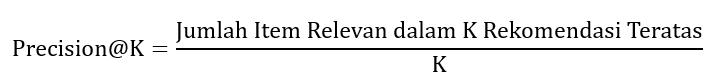



In [138]:
def precision_at_k(recommended_items, relevant_items, k):
    # Validasi input
    if k <= 0:
        raise ValueError("Nilai k harus lebih besar dari 0.")
    if len(recommended_items) == 0:
        return 0  # Jika tidak ada item yang direkomendasikan, precision = 0

    # Ambil hanya sebanyak k item atau sebanyak item yang tersedia jika k melebihi jumlah yang direkomendasikan
    recommended_k = recommended_items[:min(k, len(recommended_items))]

    # Hitung jumlah item yang relevan
    relevant_count = sum(1 for item in recommended_k if item in relevant_items)

    # Precision dihitung sebagai rasio item yang relevan dalam top-k rekomendasi
    return relevant_count / k

# Contoh penggunaan
recommended_items = list(kdrama_recommendations('Mr. Queen')['Name'])
relevant_items = [
    '100 Days My Prince', 'Rookie Historian Goo Hae Ryung',
    'The Tale of Nokdu', 'Queen In Hyun\'s Man', 'The King\'s Affection'
]  # Daftar K-Drama yang relevan
precision = precision_at_k(recommended_items, relevant_items, k=5)
print(f"Precision@5: {precision}")


Precision@5: 1.0


Nilai 1.0 berarti bahwa semua K item (rekomendasi K-Drama) teratas adalah relevan.

## **8.2 Mean Reciprocal Rank (MRR)**

Mean Reciprocal Rank (MRR) menilai seberapa cepat item relevan pertama muncul dalam daftar rekomendasi. MRR mengukur Reciprocal Rank dari item relevan pertama untuk beberapa query atau pengguna, lalu menghitung rata-ratanya.

Reciprocal Rank adalah kebalikan dari posisi item relevan pertama dalam daftar rekomendasi. MRR adalah rata-rata dari Reciprocal Rank untuk semua query atau pengguna.

Rumus:

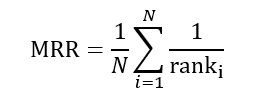

Di mana rank_𝑖 adalah posisi item relevan pertama untuk query ke-𝑖
i, dan 𝑁 adalah jumlah query.

In [139]:
def reciprocal_rank(recommended_items, relevant_items):
    for i, item in enumerate(recommended_items, start=1):
        if item in relevant_items:
            return 1 / i
    return 0

# Contoh penggunaan
recommended_items = list(kdrama_recommendations('Mr. Queen')['Name'])
relevant_items = ['100 Days My Prince', 'Rookie Historian Goo Hae Ryung',
    'The Tale of Nokdu', 'Queen In Hyun\'s Man', 'The King\'s Affection']  # Daftar K-Drama yang relevan
rr = reciprocal_rank(recommended_items, relevant_items)
print(f"Reciprocal Rank: {rr}")

Reciprocal Rank: 1.0


Nilai 1.0 berarti item relevan (Rekomendasi K-Drama) pertama selalu ada di posisi teratas.

Semakin tinggi nilai MRR, semakin cepat item relevan ditemukan di dalam daftar rekomendasi.

## **8.3 Mean Average Precision (MAP)**

Mean Average Precision (MAP) mengukur akurasi rata-rata dari semua posisi relevan dalam daftar rekomendasi dan kemudian menghitung rata-ratanya untuk semua query atau pengguna. Dimana Untuk setiap query atau pengguna, kita menghitung Average Precision (AP), yang merupakan rata-rata Precision pada setiap posisi di mana item relevan muncul. MAP adalah rata-rata dari AP untuk seluruh query.

Rumus:

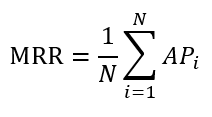

Di mana AP𝑖 adalah Average Precision untuk query ke-𝑖, dan 𝑁 adalah jumlah query.

Untuk menghitung AP, kita menggunakan

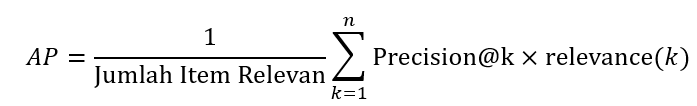

Di mana 𝑛 adalah jumlah item yang direkomendasikan, dan relevance (𝑘)
adalah 1 jika item pada posisi 𝑘 relevan, dan 0 jika tidak relevan.

In [140]:
def average_precision(recommended_items, relevant_items):
    score = 0.0
    relevant_count = 0
    for i, item in enumerate(recommended_items, start=1):
        if item in relevant_items:
            relevant_count += 1
            score += relevant_count / i
    return score / len(relevant_items) if relevant_items else 0

# Contoh penggunaan
recommended_items = list(kdrama_recommendations('Mr. Queen')['Name'])
relevant_items = ['100 Days My Prince', 'Rookie Historian Goo Hae Ryung',
    'The Tale of Nokdu', 'Queen In Hyun\'s Man', 'The King\'s Affection']  # Daftar K-Drama yang relevan
ap = average_precision(recommended_items, relevant_items)
print(f"Average Precision: {ap}")

Average Precision: 1.0


Nilai 1.0 menunjukkan bahwa semua item relevan berada di posisi paling atas dan semuanya relevan.

Jadi Berdasarkan Evaluasi menggunakan Precision@K, Mean Reciprocal Rank (MRR), dan Mean Average Precision (MAP) didapatkan nilai 1.0 yang berarti item yang di rekomendasikan relevan.

# **8. Interpretasi**

Jadi dengan menggunakan Content Based Filtering penonton K-Drama dapat menemukan judul baru yang sesuai dengan preferensi genre mereka di tengah banyaknya pilihan yang tersedia.

Genre sangat memengaruhi preferensi k-drama yang di tonton oleh penonton, penonton biasnaya lebih suka dengan K-Drama yang memiliki tema Genre yang hampir mirip.